# Solving a Simple Heat Equation with CUDA

Equation being solved $\quad — \quad u_t = \frac{1}{4} (u_{xx} + u_{yy})$  
The numerical scheme $\quad — \quad U_{ij}^{n + 1} = 
\frac{1}{4}\left(U_{i+1,j}^n + U_{i,j+1}^n + U_{i-1,j}^n + U_{i,j-1}^n\right)$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
size = 128
T = 200

!sed -ri "s/(int size = )[0-9]+/\1{size}/" laplacian.c
!sed -ri "s/(int T = )[0-9]+/\1{T}/" laplacian.c

In [26]:
!g++ laplacian.c
!./a.out

In [27]:
data = np.fromfile("output.bin", dtype=np.float32)

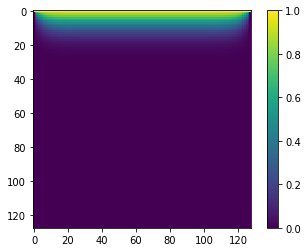

In [28]:
plt.imshow(data.reshape(size, size))
plt.colorbar();

---

In [29]:
# Run on the server:
# -------------
# ssh gpu1
# export PATH=/usr/local/cuda/bin:$PATH
# cd HPC/lab3
# nvcc laplacian_gpu.cu && ./a.out"
# =================================
!scp Vladislav.Lukoshkin@10.30.17.12:HPC/lab3/output.bin ./output_remote.bin 2> /dev/null

output.bin                                    100%   64KB  51.6KB/s   00:01    


In [30]:
# Change the mesh sizes there, on server
# T = 200
# size = 128

In [31]:
data = np.fromfile("output_remote.bin", dtype=np.float32)

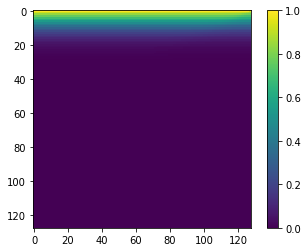

In [32]:
plt.imshow(data.reshape(size, size))
plt.colorbar();

### Possible Improvements

- Use shared memory  
(instead of reading 4 times each element from global memory,   
one can copy the entire layer from global memory to a buffer on shared memory)
- Use space-filling curve  
(decrease number of the repeated data transfers from cache/global memory to register)